In [74]:
import numpy as np
import matplotlib.pyplot as plt
import glob, sys, h5py
import seaborn as sns
import distgen 
from distgen import Generator
from distgen.writers import *
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.plot import marginal_plot
from pmd_beamphysics.interfaces.opal import write_opal


plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.rc('axes',labelsize=14)
plt.rc('axes', axisbelow=True)

# Peak Distribution

In [75]:
#Make high peak current dist
gen_peak  = Generator("laser_dist_high_peak.yaml")
part_peak = gen_peak.beam()

In [76]:
len(part_peak.t)

1000000

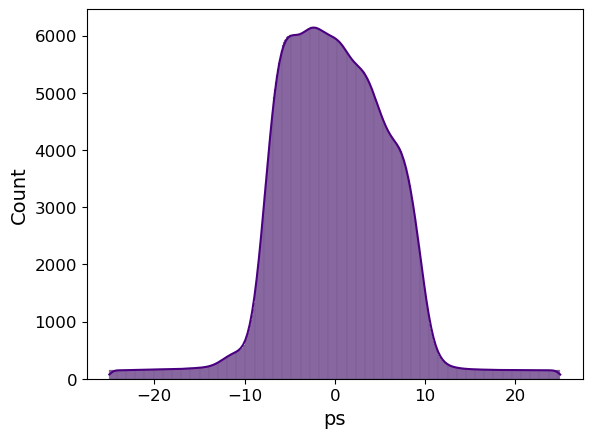

In [77]:
sns.histplot(part_peak.t.magnitude, color='indigo', stat='count', bins=500, kde=True)
plt.xlabel('ps')
plt.savefig('beamprofile_peak.pdf', dpi=300, bbox_inches='tight')
plt.show()
#80pC 

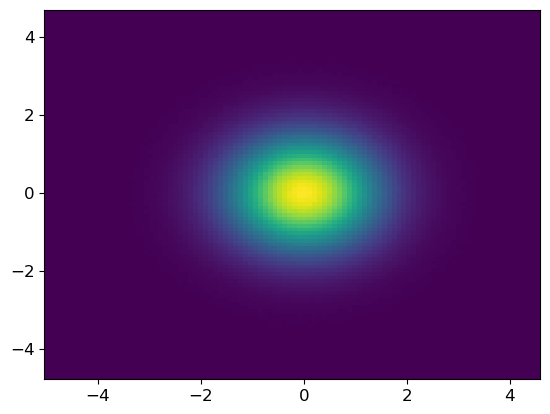

In [78]:
plt.hist2d(part_peak.x.magnitude, part_peak.y.magnitude, bins=100);

In [70]:
dir(part_peak);

In [92]:
def write_opal(particle_group, outfile, dist_type='emitted', verbose=False):
    n = particle_group.n_particle
    x = particle_group.x.magnitude
    y = particle_group.y.magnitude

    # Get longitudinal coordinate
    if dist_type == "emitted":
        # Check that z are all the same
        unique_z = np.unique(particle_group.z.magnitude)
        assert len(unique_z) == 1, "All particles must be a the same z position"

        z = particle_group.t

    elif dist_type == "injected":
        # Check that t are all the same
        unique_t = np.unique(particle_group["t"])
        assert len(unique_t) == 1, "All particles must be a the same time"

        z = particle_group.z

    else:
        raise ValueError(f"unknown dist_type: {dist_type}")

    gamma = particle_group.gamma.magnitude
    GBx = gamma * particle_group.beta_x.magnitude
    GBy = gamma * particle_group.beta_y.magnitude
    GBz = gamma * particle_group.beta_z.magnitude

    header = str(n)
    z = z - max(z)
    dat = np.array([x, GBx, y, GBy, z, GBz]).T

    if verbose:
        print(f"writing {dist_type} {n} particles to {outfile}")
    np.savetxt(outfile, dat, header=header, comments="", fmt="%20.12e")

In [93]:
write_opal(part_peak, 'opal_peak_dist.txt', dist_type="emitted", verbose=True)

/var/folders/mk/kfdfrfn95k578mkmcg4c1k2hk_9snv/T/ipykernel_37534/1456956998.py:31: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  dat = np.array([x, GBx, y, GBy, z, GBz]).T


writing emitted 1000000 particles to opal_peak_dist.txt


# Broad Distribution

In [94]:
gen_broad  = Generator("laser_dist_broad_peak.yaml")
part_broad = gen_broad.beam()

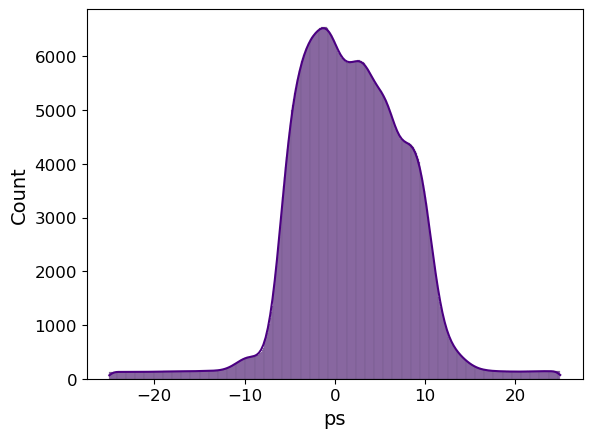

In [95]:
sns.histplot(part_broad.t.magnitude, color='indigo', stat='count', bins=500, kde=True)
plt.xlabel('ps')
plt.savefig('beamprofile_broad.pdf', dpi=300, bbox_inches='tight')
plt.show()
#40pC

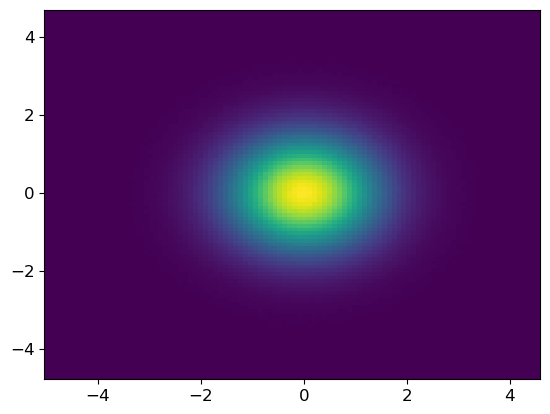

In [96]:
plt.hist2d(part_broad.x.magnitude, part_broad.y.magnitude, bins=100);

In [97]:
write_opal(part_broad, 'opal_broad_dist.txt', dist_type="emitted", verbose=True)

/var/folders/mk/kfdfrfn95k578mkmcg4c1k2hk_9snv/T/ipykernel_37534/1456956998.py:31: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  dat = np.array([x, GBx, y, GBy, z, GBz]).T


writing emitted 1000000 particles to opal_broad_dist.txt


In [98]:
test_dist = np.loadtxt('opal_broad_dist.txt', skiprows=1)

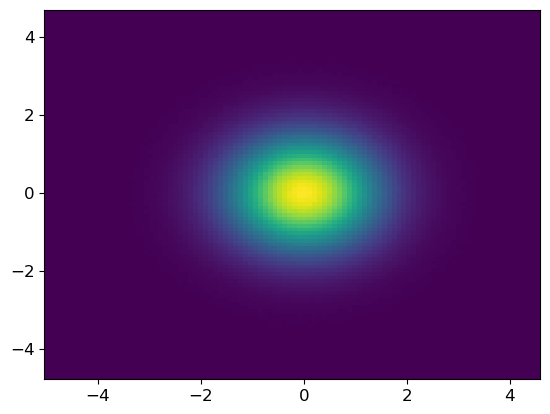

In [99]:
plt.hist2d(test_dist[:,0], test_dist[:,2], bins=100);

<Axes: ylabel='Count'>

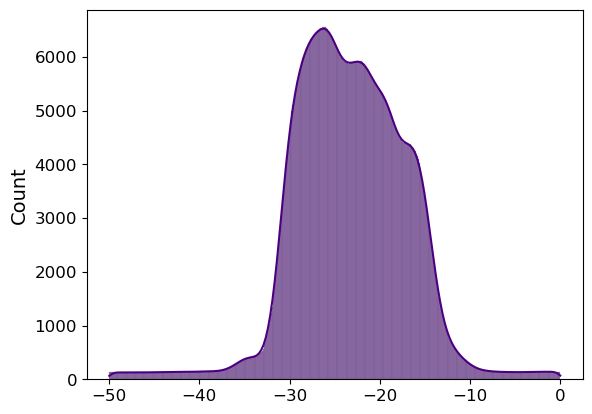

In [100]:
sns.histplot(test_dist[:,4], color='indigo', stat='count', bins=500, kde=True)

<Axes: ylabel='Count'>

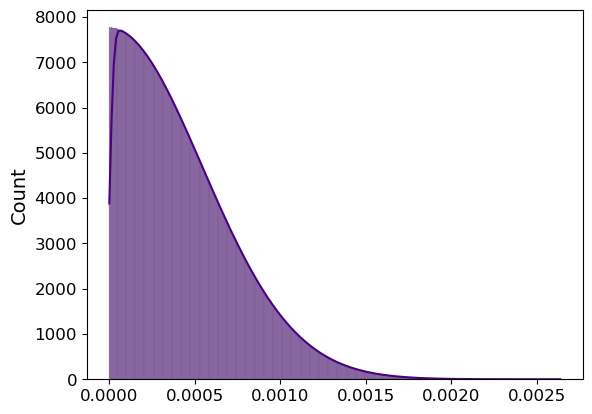

In [101]:
sns.histplot(test_dist[:,5], color='indigo', stat='count', bins=500, kde=True)

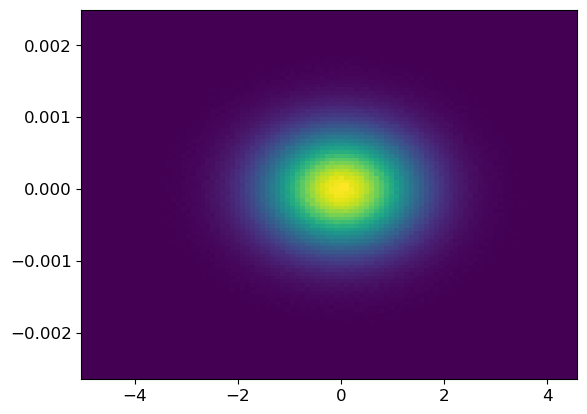

In [102]:
plt.hist2d(test_dist[:,0], test_dist[:,1], bins=100);

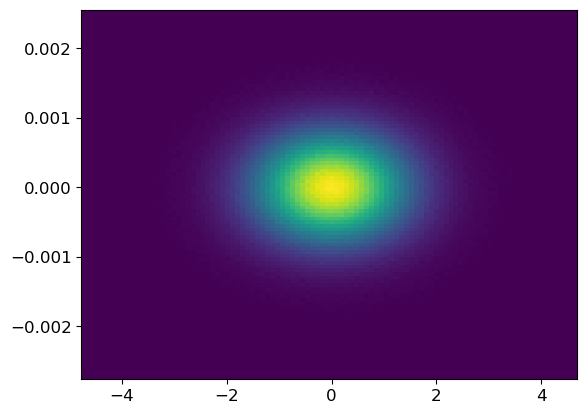

In [103]:
plt.hist2d(test_dist[:,2], test_dist[:,3], bins=100);